## 导入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font='SimHei', rc={'axes.unicode_minus':False})
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r'data_set/aqi_data.csv')
print(data.shape)
data.head()

(325, 12)


,City,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
0,Ngawa Prefecture,23,665.1,271.13,8.200000,102.224650,31.899410,2617.0,11,0,36.00,23.00
1,Aksu City,137,80.4,610.00,12.276712,80.263380,41.167540,1108.0,6547,0,33.94,23.00
2,Alxa League,85,150.0,322.58,24.200000,105.728950,38.851920,1673.0,1,0,36.00,23.00
3,Ngari,28,74.2,37.40,1.000000,80.105800,32.501110,4280.0,1,0,36.00,23.00
4,Anqin City,79,2127.8,1613.20,17.291781,117.034431,30.512646,13.0,2271,0,45.80,27.48


## 数据清廷

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     325 non-null    object 
 1   AQI                      325 non-null    int64  
 2   Precipitation            321 non-null    float64
 3   GDP                      325 non-null    float64
 4   Temperature              325 non-null    float64
 5   Longitude                325 non-null    float64
 6   Latitude                 325 non-null    float64
 7   Altitude                 325 non-null    float64
 8   PopulationDensity        325 non-null    int64  
 9   Coastal                  325 non-null    int64  
 10  GreenCoverageRate        325 non-null    float64
 11  Incineration(10,000ton)  325 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 30.6+ KB


In [4]:
data['Precipitation'].skew()

0.27360760671177387

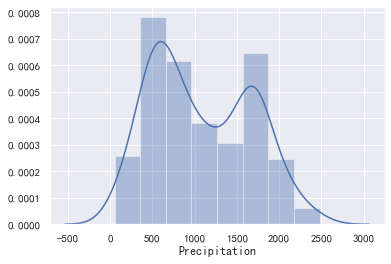

In [5]:
sns.distplot(data['Precipitation'].dropna())

In [6]:
data.fillna({'Precipitation':data['Precipitation'].median()}, inplace=True)

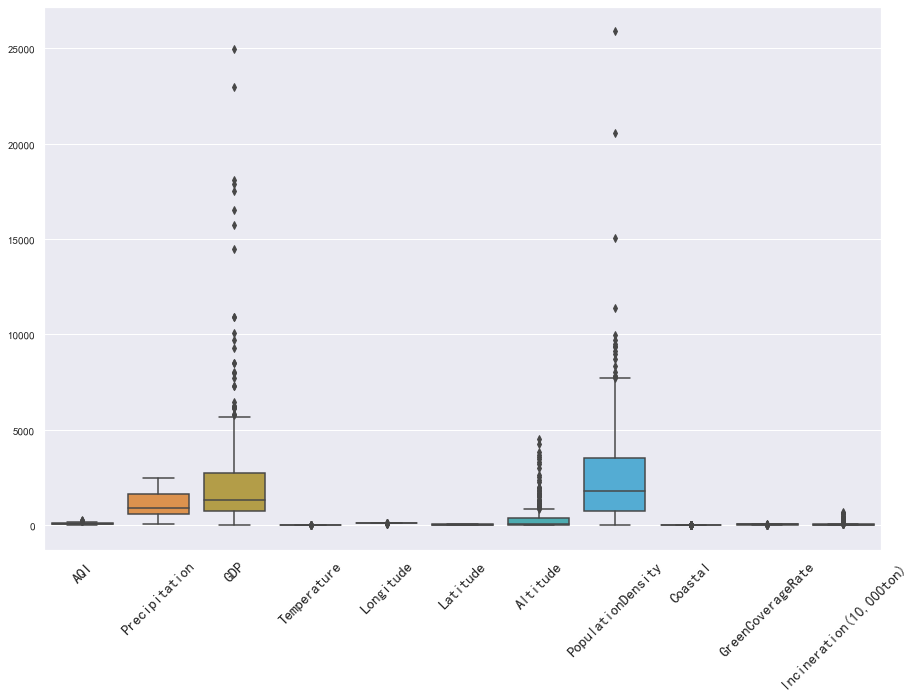

In [7]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45, fontsize=15)
sns.boxplot(data=data)

In [8]:
data.duplicated().sum()

2

In [9]:
data.drop_duplicates(inplace=True)

## 数据分析

In [10]:
t=data[['City', 'AQI']].sort_values('AQI')
display(t.iloc[:5])

,City,AQI
204,Shaoguan City,12
163,Nanping City,12
154,Meizhou City,12
91,Keelung City,13
195,Sanming City,13


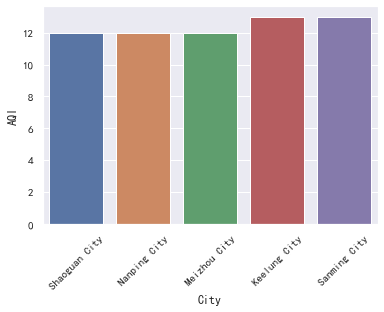

In [11]:
plt.xticks(rotation=45)
sns.barplot(x='City', y='AQI', data=t.iloc[:5])

In [12]:
display(t.iloc[-5:])

,City,AQI
105,Jiaozuo City,199
112,Jinzhou City,202
13,Baoding City,220
26,Chaoyang City,224
16,Beijing City,296


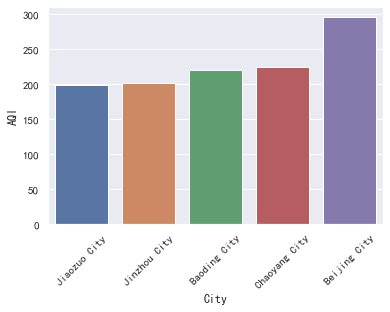

In [13]:
plt.xticks(rotation=45)
sns.barplot(x='City', y='AQI', data=t.iloc[-5:])

In [14]:
def value2level(aqi):
    if aqi>=0 and aqi <=50:
        return '1st Class'
    elif aqi>=51 and aqi <=100:
        return '2nd Class'
    elif aqi>=100 and aqi <=150:
        return '3rd Class'
    elif aqi >=151 and aqi<=200:
        return '4th Class'
    elif aqi>201 and aqi<300:
        return '5th Class'
    else:
        return '6th Class'

In [15]:
level=data['AQI'].apply(value2level)
display(level.value_counts())

2nd Class    136
1st Class    103
3rd Class     66
4th Class     14
5th Class      4
Name: AQI, dtype: int64

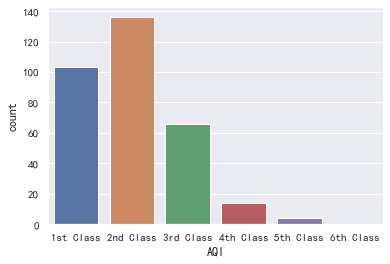

In [16]:
sns.countplot(x=level, order=['1st Class', '2nd Class', '3rd Class', '4th Class', '5th Class', '6th Class'])

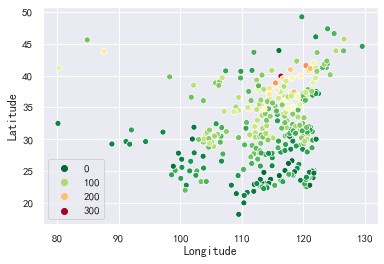

In [17]:
sns.scatterplot(x='Longitude', y='Latitude', hue=data['AQI'].tolist(), palette=plt.cm.RdYlGn_r, data=data)

In [18]:
data['AQI'].mean()

75.3343653250774

In [19]:
data['AQI'].std()

42.99573460517677

In [20]:
# t检验，与流传值72对比
from scipy import stats

r=stats.ttest_1samp(data['AQI'], 72)
print('t value:', r.statistic)
print('p value:', r.pvalue)

t value: 1.393763441074581
p value: 0.16435019471704654


p值大于0.05，在显著水平为0.05检验下，无法拒绝原假设，因些接受原假设，与假设72值无明显差异

In [21]:
# 计算全国城市空气质量的置信区间
n=len(data)
df=n-1
left=stats.t.ppf(0.025, df=df)
right=stats.t.ppf(0.975, df=df)
print(left, right)
mean=data['AQI'].mean()
std=data['AQI'].std()
print(mean+left*(std/np.sqrt(n)), (mean+right*(std/np.sqrt(n))))

-1.9673585853224684 1.967358585322468
70.6277615675309 80.0409690826239


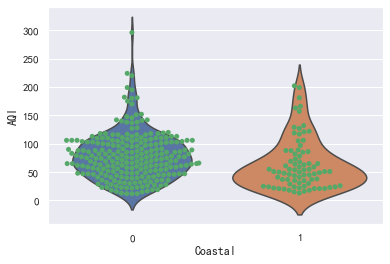

In [24]:
sns.violinplot(x='Coastal', y='AQI', data=data, inner=None)
sns.swarmplot(x='Coastal', y='AQI', data=data, color='g')

In [26]:
coastal=data[data['Coastal']==1]['AQI']
inland=data[data['Coastal']==0]['AQI']
# 方差齐性检验。为后续两样本T检验服务
stats.levene(coastal, inland)

LeveneResult(statistic=0.08825036641952543, pvalue=0.7666054880248168)

In [29]:
# 进行两样本T检验
stats.ttest_ind(coastal, inland, equal_var=True)

Ttest_indResult(statistic=-2.7303827520948905, pvalue=0.006675422541012958)

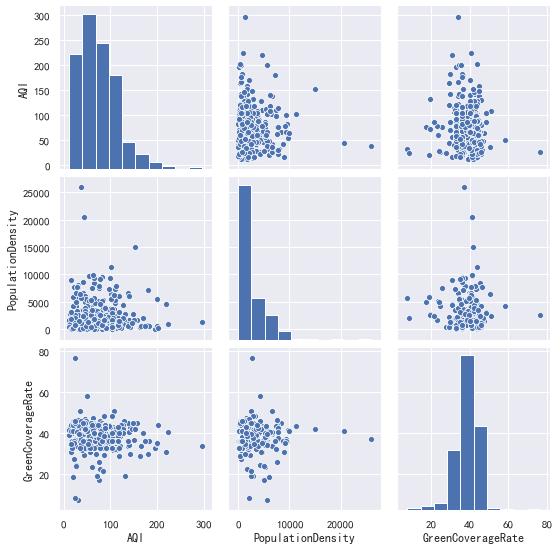

In [30]:
sns.pairplot(data[['AQI', 'PopulationDensity', 'GreenCoverageRate']])

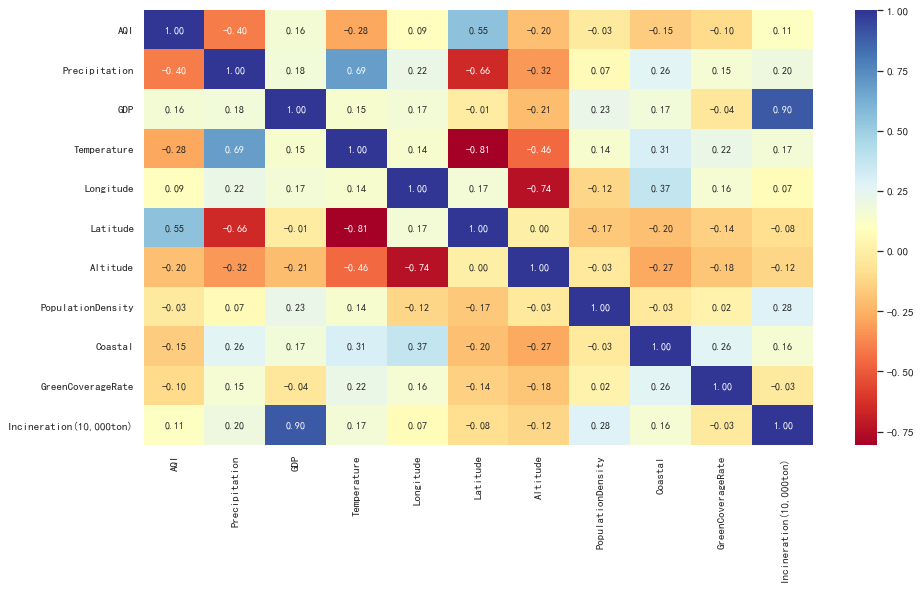

In [31]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), cmap=plt.cm.RdYlBu, annot=True, fmt='.2f')

- 纬度越低，空气质量越好。
- 降雨量越低，空气质量越好。

## 机器学习算法预测

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=data.drop(['City', 'AQI'], axis=1)
y=data['AQI']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)
lr=LinearRegression()
lr.fit(X_train, y_train)
y_hat=lr.predict(X_test)
lr.score(X_train, y_train)

0.4685357478390666

In [34]:
lr.score(X_test, y_test)

0.30759980354177274

Text(0.5, 1.0, '线性回归预测结果')

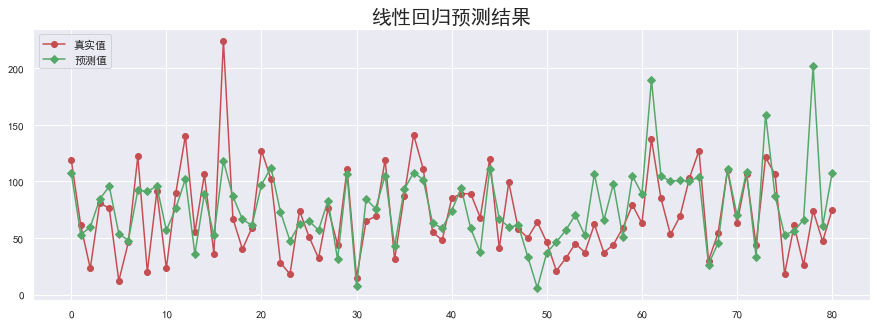

In [36]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, '-r', label='真实值', marker='o')
plt.plot(y_hat, '-g', label='预测值', marker='D')
plt.legend()
plt.title('线性回归预测结果', fontsize=20)

In [54]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf=RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)
y_hat=rf.predict(X_test)
rf.score(X_train, y_train)

0.9375592254941048

In [55]:
rf.score(X_test, y_test)

0.6106531491491578

Text(0.5, 1.0, '线性回归预测结果')

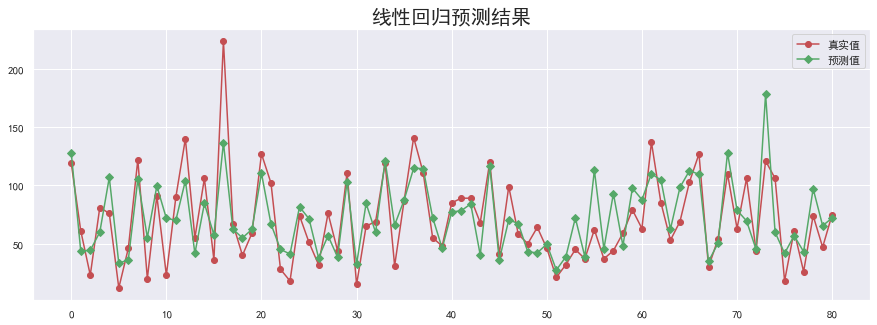

In [56]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, '-r', label='真实值', marker='o')
plt.plot(y_hat, '-g', label='预测值', marker='D')
plt.legend()
plt.title('线性回归预测结果', fontsize=20)

In [57]:
gb=GradientBoostingRegressor(n_estimators=500, random_state=0)
rf.fit(X_train, y_train)
y_hat=rf.predict(X_test)
rf.score(X_train, y_train)

0.9375592254941048

In [58]:
rf.score(X_test, y_test)

0.6106531491491578

Text(0.5, 1.0, '线性回归预测结果')

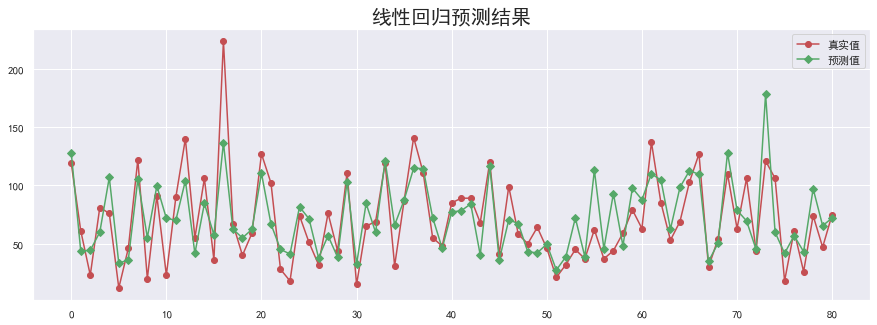

In [59]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, '-r', label='真实值', marker='o')
plt.plot(y_hat, '-g', label='预测值', marker='D')
plt.legend()
plt.title('线性回归预测结果', fontsize=20)

In [60]:
import xgboost

In [61]:
xgb=xgboost.XGBRegressor(n_estimators=500, random_state=0)
xgb.fit(X_train, y_train)
y_hat=xgb.predict(X_test)
rf.score(X_train, y_train)

0.9375592254941048

In [62]:
xgb.score(X_test, y_test)

0.5258725699067295

Text(0.5, 1.0, '线性回归预测结果')

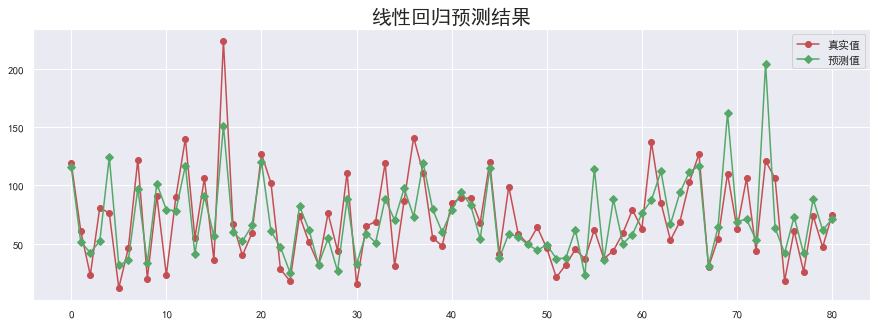

In [63]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, '-r', label='真实值', marker='o')
plt.plot(y_hat, '-g', label='预测值', marker='D')
plt.legend()
plt.title('线性回归预测结果', fontsize=20)